In [1]:
import sys
sys.path.insert(0, '/home/cholobetz/projects/torch_tem/src')
print(sys.path)

['/home/cholobetz/projects/torch_tem/src', '/home/cholobetz/projects/torch_tem', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python39.zip', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/lib-dynload', '', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/IPython/extensions', '/home/cholobetz/.ipython']


In [2]:
import torch
import numpy as np
import test
import analyse
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
from importlib import reload
from itertools import permutations
import world
import glob
import plot
from scipy.sparse.csgraph import shortest_path

In [3]:
def trajectory_len(trajectory):
    return abs(trajectory[1] - trajectory[0]) * 2 + 6

In [4]:
def make_trajectory_dict():
    trajectories = permutations(np.arange(6), r=2)
    trajectory_dict = {}
    for traj_idx, traj in enumerate(trajectories):
        trajectory_dict[traj] = traj_idx
    return trajectory_dict

In [5]:
def locations_in_trajectory(trajectory, environment):
    
    adjacency = np.array(self.adjacency) 
    dists, pred = shortest_path(adjacency, directed=False, method='FW', return_predecessors=True)

    trajectory_locs = [environment.locations[state_id] for state_id in self.get_path(pred, curr_arm_end_state, new_arm_end_state)][1:]
    

In [6]:
def print_proper_time(seconds):
    # hours
    if seconds > 3600:
        output_str = '{0} hours'.format(seconds / 3600)
    # minutes
    elif seconds > 60:
        output_str = '{0} minutes'.format(seconds / 60)
    # seconds
    else:
        output_str = '{0} seconds'.format(seconds)
    return 'Finished running in ' + output_str

In [7]:
def get_path(pred, start, goal):
    path = [goal]
    k = goal
    while pred[start, k] != -9999:
        path.append(pred[start, k])
        k = pred[start, k]
    return path[::-1]

In [8]:
def get_trajectory_states(trajectory, environment):
    
    trajectory_dict = analyse.make_trajectory_dict()
    # Calculate graph properties for shortest path calculation between arms
    adjacency = np.array(environment.adjacency) 
    dists, pred = shortest_path(adjacency, directed=False, method='FW', return_predecessors=True)

    curr_arm_end_state = trajectory[0] * 5
    new_arm_end_state = trajectory[1] * 5
    # Using the adjacency matrix, create a trajectory using a shortest path traversal from end of curr_arm to end of new_arm
    #trajectory = self.get_path(pred, curr_arm_end_state, new_arm_end_state)[1:]
    #print(trajectory)
    
    return [environment.locations[state_id]['id'] for state_id in get_path(pred, curr_arm_end_state, new_arm_end_state)][1:]

state_seq_a = np.array(get_trajectory_states((1, 0), envs[0]))
state_seq_b = np.array(get_trajectory_states((1, 2), envs[0]))
unambiguous_locs = state_seq_a != state_seq_b
print(state_seq_a)
print(state_seq_b)
print(state_seq_a[unambiguous_locs])
print(state_seq_b[unambiguous_locs])

In [45]:
def linearize_trajectory(p_env, frequency, trajectory, cell_num, environment):

    trajectory_dict = make_trajectory_dict()
    trajectory_states = get_trajectory_states(trajectory, environment)
    trajectory_i = trajectory_dict[trajectory]
    
    linearized_rate = np.array(p_env[frequency][trajectory_i])[:, cell_num][trajectory_states]
    
    return linearized_rate

In [46]:
def linearize_neighbor_trajectories(p_env, frequency, cell_num, environment):
    
    all_trajectories = analyse.make_trajectory_dict()
    neighbor_trajectories = [trajectory for trajectory in all_trajectories if abs(trajectory[0] - trajectory[1]) == 1]
    
    linearized_dict = {}
    
    for trajectory in neighbor_trajectories:
        linearized_dict[trajectory] = linearize_trajectory(p_env, frequency,  trajectory, cell_num, environment)
    
    return linearized_dict

In [47]:
# Make a list of all neighbor_trajectories

In [48]:
all_trajectories = analyse.make_trajectory_dict()
neighbor_trajectories = [trajectory for trajectory in all_trajectories if abs(trajectory[0] - trajectory[1]) == 1]

In [49]:
IDX = '47000'

In [50]:
# 2022-04-21; run0 uses purely sweeping policy
DATE = '2022-04-21'
RUN = '0'
PATH = '/cumulus/cristofer/TEM_data/{0}/run{1}/model/'.format(DATE, RUN)
SAVE_DIR = '/cumulus/cristofer/TEM_figs/{0}/run{1}/'.format(DATE, RUN)

In [51]:
params = torch.load('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/model/params_' + IDX + '.pt')

# Make list of all the environments that this model was trained on
env_list = list(glob.iglob('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/script/envs/*'))

# Set which environments will include shiny objects
shiny_envs = [False, False, False, False]
# Set the number of walks to execute in parallel (batch size)
n_walks = len(shiny_envs)
# Select environments from the environments included in training
environments = [world.World(graph, randomise_observations=params['randomise_observations'], shiny=(params['shiny'] if shiny_envs[env_i] else None), specify_behavior=params['specify_behavior'], behavior_type=params['behavior_type'], seed=0) for env_i, graph in enumerate(np.random.choice(env_list, n_walks))]

BEHAVIOR_TYPE, BEHAVIOR_SEED = params['behavior_type'], params['behavior_seed']

In [52]:
fwd, mod, envs = test.get_forward(date=DATE, run=RUN, env_to_plot=0, index=IDX, seed=BEHAVIOR_SEED)

In [53]:
all_g_sweep, all_p_sweep = analyse.trajectories_rate_maps(fwd, mod, envs)

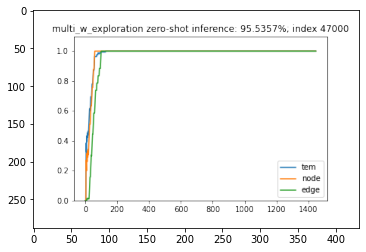

In [54]:
fig, ax = plt.subplots()#figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_performance.png'.format(IDX, BEHAVIOR_SEED))

ax.imshow(im)

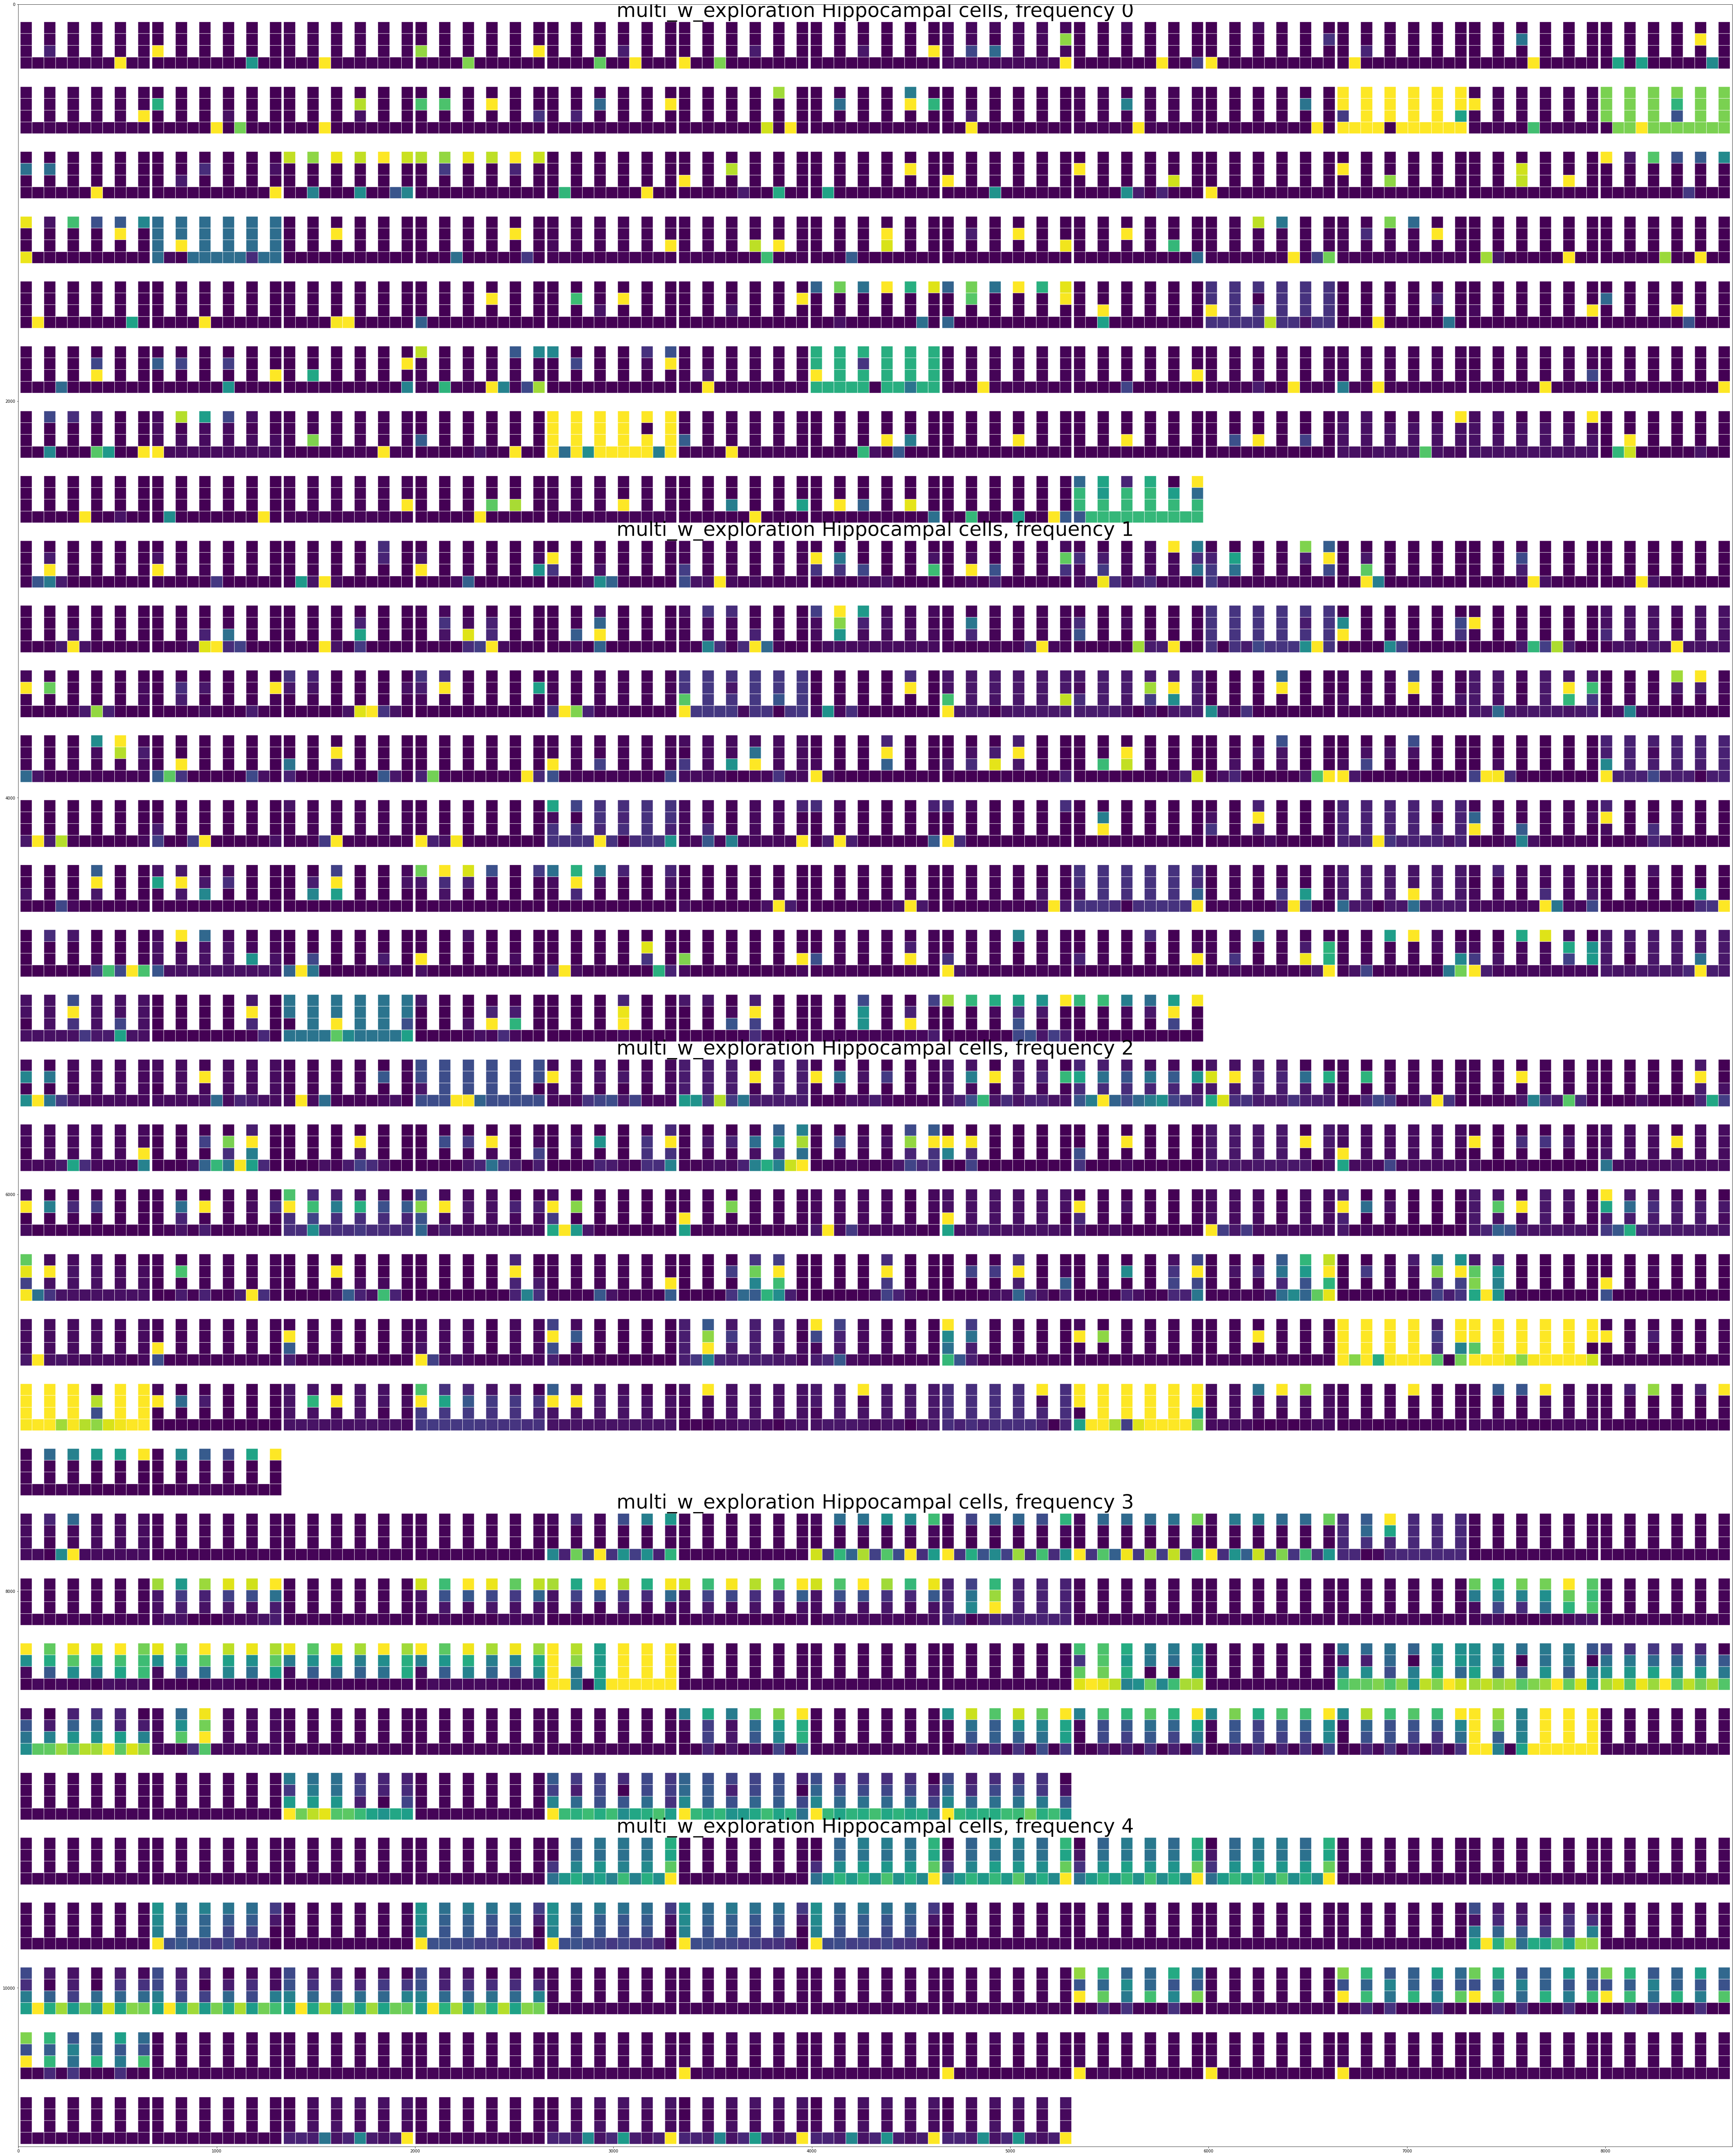

In [55]:
fig, ax = plt.subplots(figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_Hippocampal_cells.png'.format(IDX, BEHAVIOR_SEED))

ax.imshow(im)

In [56]:
IDX2 = '39000'

In [57]:
# 2022-04-21; run0 uses purely sweeping policy
DATE = '2022-04-21'
RUN = '1'
PATH = '/cumulus/cristofer/TEM_data/{0}/run{1}/model/'.format(DATE, RUN)
SAVE_DIR = '/cumulus/cristofer/TEM_figs/{0}/run{1}/'.format(DATE, RUN)

In [58]:
params = torch.load('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/model/params_' + IDX2 + '.pt')

# Make list of all the environments that this model was trained on
env_list = list(glob.iglob('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/script/envs/*'))

# Set which environments will include shiny objects
shiny_envs = [False, False, False, False]
# Set the number of walks to execute in parallel (batch size)
n_walks = len(shiny_envs)
# Select environments from the environments included in training
environments = [world.World(graph, randomise_observations=params['randomise_observations'], shiny=(params['shiny'] if shiny_envs[env_i] else None), specify_behavior=params['specify_behavior'], behavior_type=params['behavior_type'], seed=0) for env_i, graph in enumerate(np.random.choice(env_list, n_walks))]

BEHAVIOR_TYPE2, BEHAVIOR_SEED2 = params['behavior_type'], params['behavior_seed']

In [59]:
fwd, mod, envs = test.get_forward(date=DATE, run=RUN, env_to_plot=0, index=IDX2, seed=BEHAVIOR_SEED2)

In [60]:
all_g_random, all_p_random = analyse.trajectories_rate_maps(fwd, mod, envs)

In [61]:
np.array(all_p_sweep[0][0][0])[:, 0]

array([-9.99000000e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.72781612e-04,  0.00000000e+00,  0.00000000e+00,  8.84673675e-04,
       -2.33954124e-04, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02])

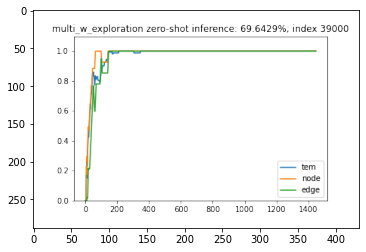

In [62]:
fig, ax = plt.subplots()#figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_performance.png'.format(IDX2, BEHAVIOR_SEED2))

ax.imshow(im)

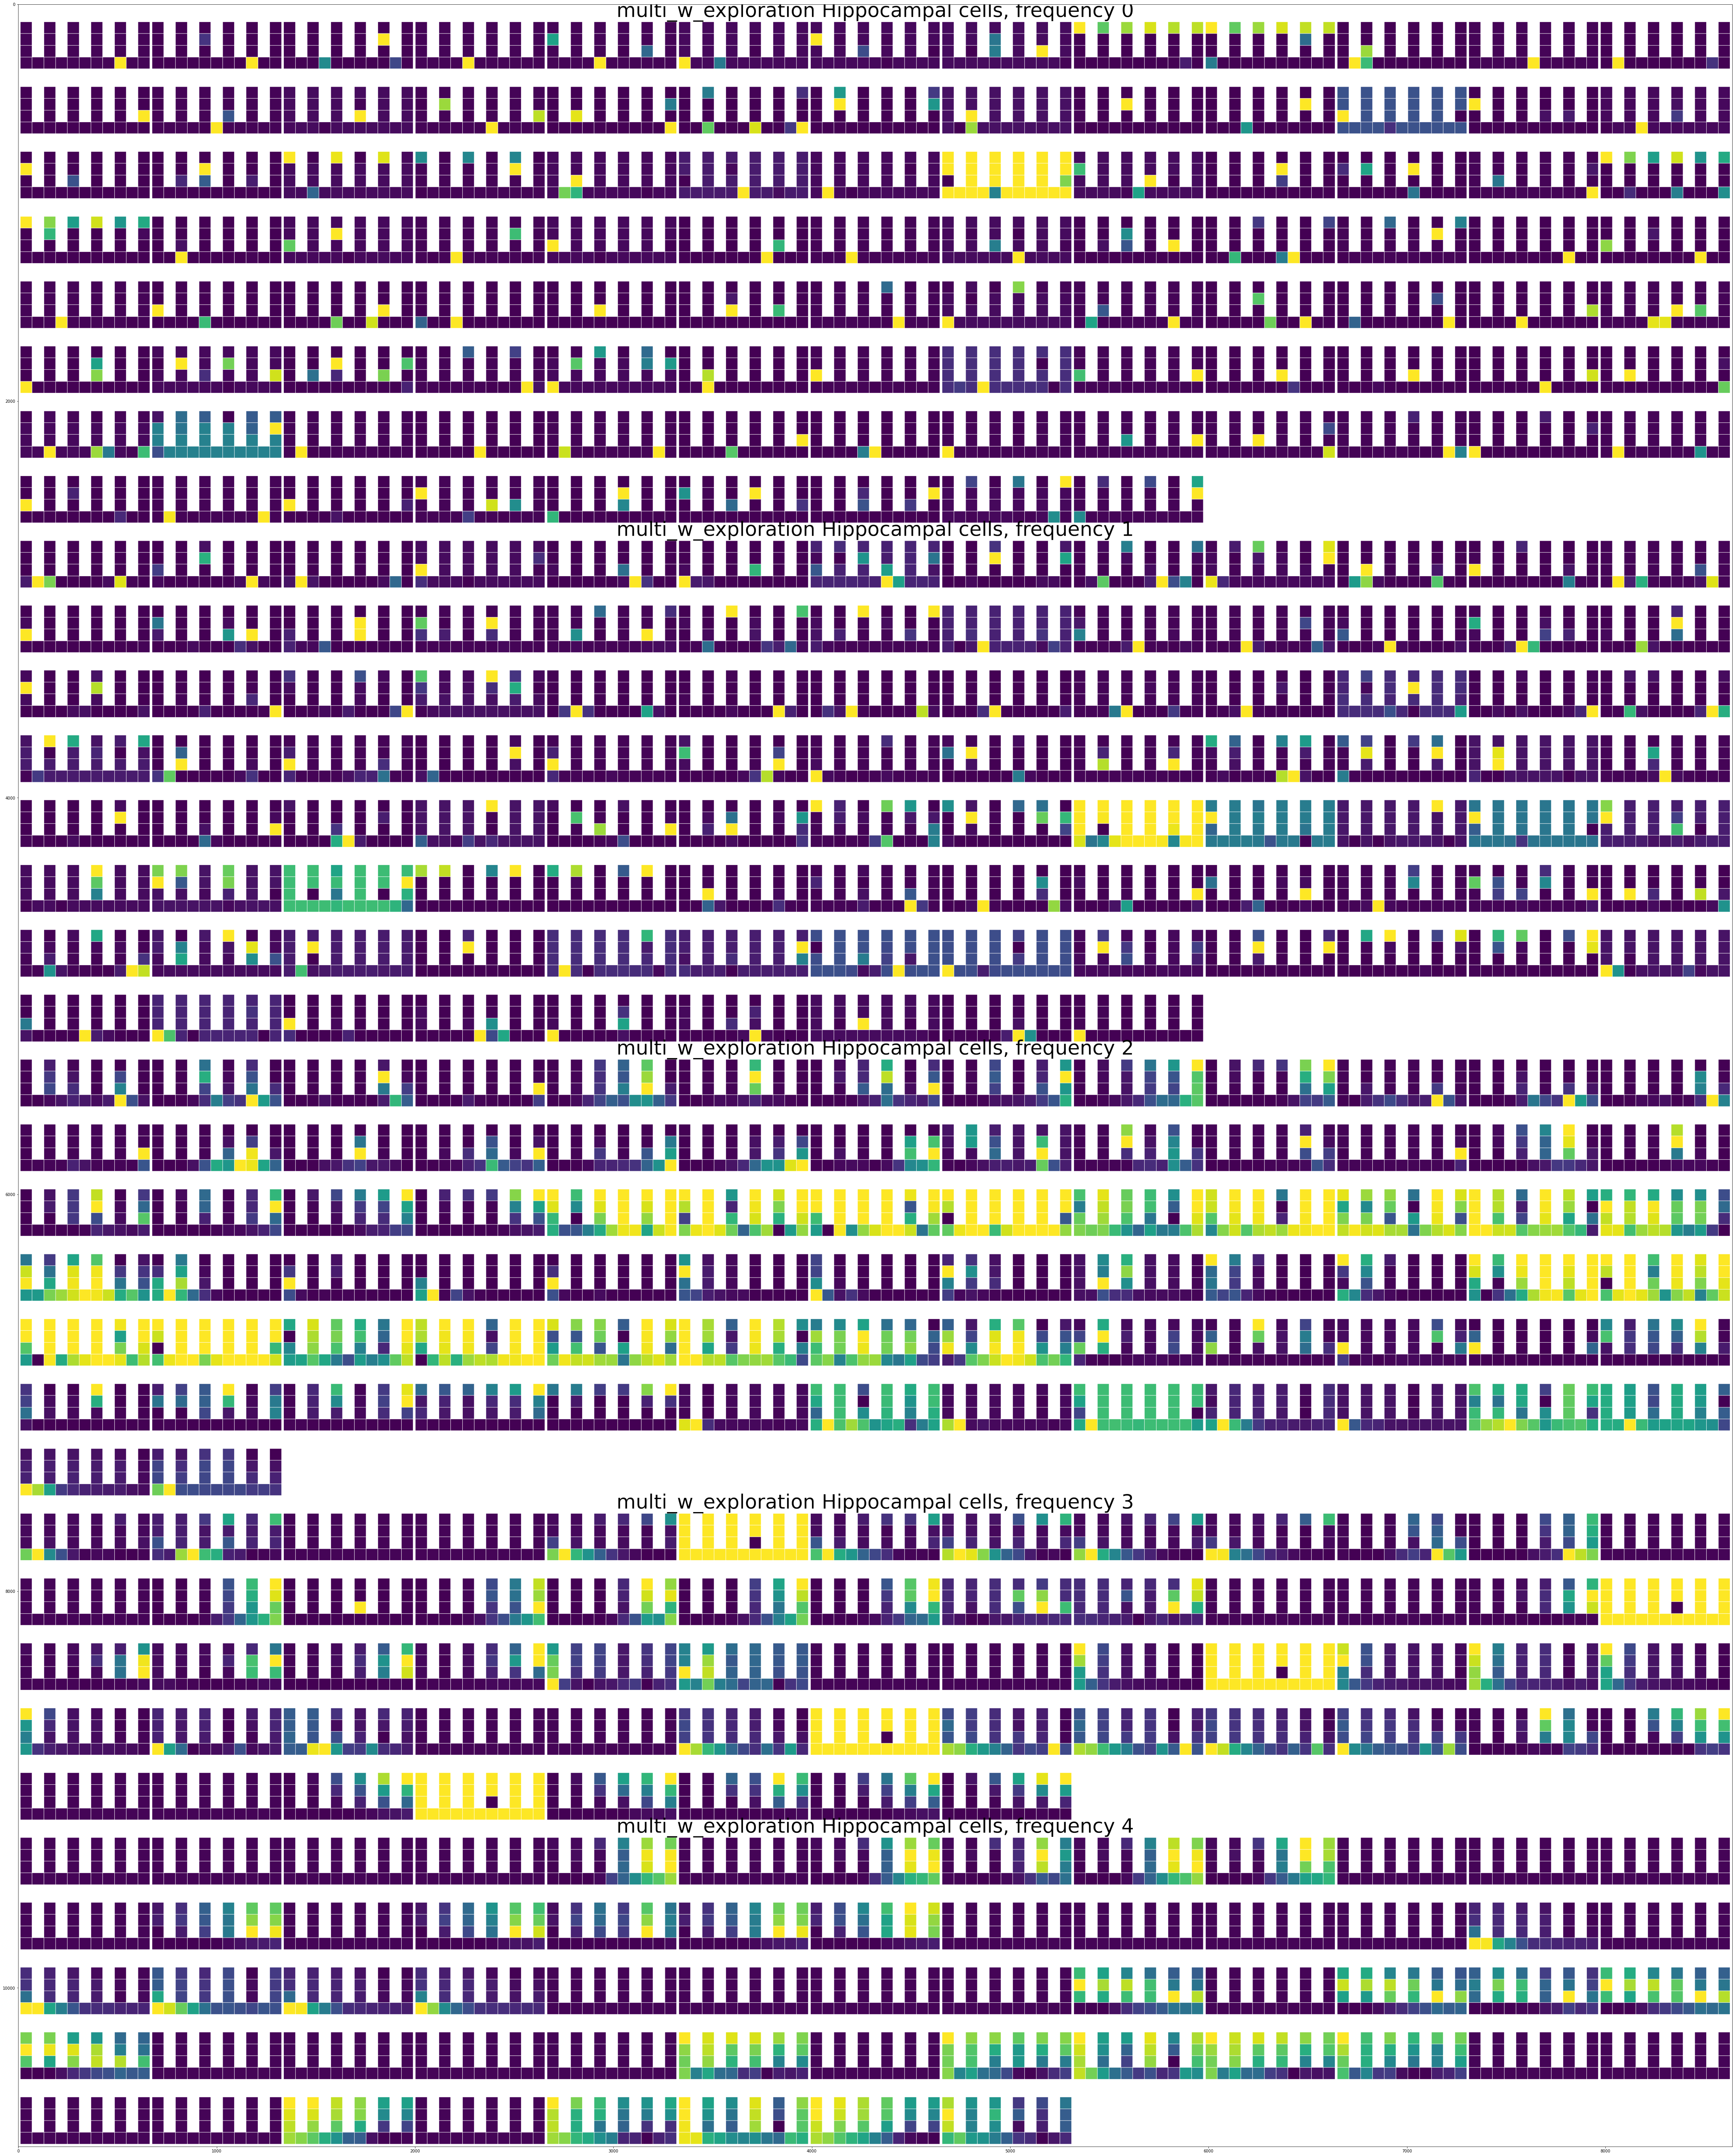

In [63]:
fig, ax = plt.subplots(figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_{1}_Hippocampal_cells.png'.format(IDX2, BEHAVIOR_SEED2))

ax.imshow(im)

In [103]:
neighbor_trajectories

[(0, 1),
 (1, 0),
 (1, 2),
 (2, 1),
 (2, 3),
 (3, 2),
 (3, 4),
 (4, 3),
 (4, 5),
 (5, 4)]

In [105]:
def get_path_dependence_vector(all_p_env, frequency, cell_num, environment, zero_trajectory_threshold=0, impute_val=1, verbose=False):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)
    print(linearized_dict)
    
    flip_direction = []
    flip_direction_sum_list = []
    
    same_end = []
    same_end_sum_list = []
    
    same_start = []
    same_start_sum_list = []
    
    trajectory_dict = make_trajectory_dict()
    
    which_trajectories_flip = []
    which_trajectories_same_start = []
    which_trajectories_same_end = []
    #print(linearized_dict)
    # Collect values for reverse-direction trajectories
    for traj_i, traj_a_ident in enumerate(neighbor_trajectories):
        for traj_b_ident in neighbor_trajectories[traj_i:]:
            all_arms = traj_a_ident + traj_b_ident
            if (min(traj_a_ident) <= min(traj_b_ident)) and (max(all_arms) - min(all_arms) <= 2) and (traj_a_ident != traj_b_ident):
                traj_a_state_seq = np.array(analyse.get_trajectory_states(traj_a_ident, environment))
                traj_b_state_seq = np.array(analyse.get_trajectory_states(traj_b_ident, environment))
                #if verbose:
                    #print(traj_a_state_seq)
                shared_trajectory_locations = traj_a_state_seq == traj_b_state_seq
                
                trace_a = linearized_dict[traj_a_ident]
                trace_b = linearized_dict[traj_b_ident]
                
                if traj_a_ident == traj_b_ident[::-1]:
                    flip_direction_sum_list.append(np.max([np.sum(np.abs(trace_a[1:-1])), np.sum(np.abs(trace_b[1:-1]))]))
                    flip_direction.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    which_trajectories_flip.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                elif traj_a_ident[0] == traj_b_ident[0]:
                    same_start_sum_list.append(np.max([np.sum(np.abs(trace_a[shared_trajectory_locations])), np.sum(np.abs(trace_b[shared_trajectory_locations]))]))
                    same_start.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    #if verbose:
                        #print('shared_start'.format(shared_trajectory_locations))
                    which_trajectories_same_start.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                elif traj_a_ident[1] == traj_b_ident[1]:
                    #print('!: {0}'.format(trace_a[shared_trajectory_locations].shape))
                    #print(trace_a[shared_trajectory_locations])
                    #print(trace_b[shared_trajectory_locations])
                    #print(shared_trajectory_locations)
                    #print('{0}: {1}, {2}: {3}'.format(traj_a_ident, np.sum(np.abs(trace_a[shared_trajectory_locations])), traj_b_ident, np.sum(np.abs(trace_b[shared_trajectory_locations]))))
                    same_end_sum_list.append(np.max([np.sum(np.abs(trace_a[shared_trajectory_locations])), np.sum(np.abs(trace_b[shared_trajectory_locations]))]))
                    same_end.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    #if verbose:
                        #print('shared_end'.format(shared_trajectory_locations))
                    which_trajectories_same_end.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                    
    flip_direction_sum_arr = np.array(flip_direction_sum_list)
    flip_direction = np.array(flip_direction)
    flip_direction_idxs = np.argsort(flip_direction_sum_arr)[::-1]
    which_trajectories_flip = np.array(which_trajectories_flip)
    
    if verbose:
        print(which_trajectories_flip.shape)
    
    same_start_sum_arr = np.array(same_start_sum_list)
    same_start = np.array(same_start)
    same_start_idxs = np.argsort(same_start_sum_arr)[::-1]
    which_trajectories_same_start = np.array(which_trajectories_same_start)
    
    if verbose:
        print(which_trajectories_same_start.shape)
        print('which_trajectories_same_start: {0}'.format(which_trajectories_same_start[same_start_idxs]))
        print('same_start_sum_arr: {0}'.format(same_start_sum_arr[same_start_idxs]))
        
    same_end_sum_arr = np.array(same_end_sum_list)
    same_end = np.array(same_end)
    same_end_idxs = np.argsort(same_end_sum_arr)[::-1]
    which_trajectories_same_end = np.array(which_trajectories_same_end)
    if verbose:
        print(which_trajectories_same_end.shape)
        print('which_trajectories_same_end: {0}'.format(which_trajectories_same_end[same_end_idxs]))
        print('same_end_sum_arr: {0}'.format(same_end_sum_arr[same_end_idxs]))
    #return np.hstack([flip_direction[flip_direction_idxs], same_start[same_start_idxs], same_end[same_end_idxs]]), np.hstack([which_trajectories_flip[flip_direction_idxs], which_trajectories_same_start[same_start_idxs], which_trajectories_same_end[same_end_idxs]])
    
    return np.hstack([flip_direction[flip_direction_idxs], same_start[same_start_idxs], same_end[same_end_idxs]])


In [106]:
# Path Dependence metrics

In [107]:
def plot_flip_direction(all_p_env, frequency, cell_num, environment, ax):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)
    
    for left_arm in np.arange(5):
        
        trajectory = (left_arm, left_arm+1)
        reverse_trajectory = trajectory[::-1]
        
        ax.plot(linearized_dict[trajectory][:-1], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        ax.plot(linearized_dict[reverse_trajectory][:-1][::-1], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        
    ax.legend(bbox_to_anchor=(1.1, 1))
    
    return ax

In [108]:
def plot_same_start(all_p_env, frequency, cell_num, environment, ax):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)

    for arm1 in np.arange(1, 5):
        
        to_left = (arm1, arm1-1)
        to_right = (arm1, arm1+1)
        ax.plot(linearized_dict[to_left][:3], label='{0}'.format((to_left[0]+1, to_left[1]+1)))
        ax.plot(linearized_dict[to_right][:3], label='{0}'.format((to_right[0]+1, to_right[1]+1)))
        ax.set_xticks(np.arange(3))
        
    ax.legend()
    
    return ax

In [109]:
def plot_same_end(all_p_env, frequency, cell_num, environment, ax):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)

    for arm2 in np.arange(1, 5):
        
        from_left = (arm2-1, arm2)
        from_right = (arm2+1, arm2)
        ax.plot(linearized_dict[from_left][4:], label='{0}'.format((from_left[0]+1, from_left[1]+1)))
        ax.plot(linearized_dict[from_right][4:], label='{0}'.format((from_right[0]+1, from_right[1]+1)))
        xticks = ax.set_xticks(np.arange(4))
        ax.set_xticklabels(np.arange(4, 8))
        
    ax.legend()
    
    return ax

In [110]:
ZERO_TRAJECTORY_THRESHOLD = 0

In [116]:
import importlib
importlib.reload(analyse)

<module 'analyse' from '/home/cholobetz/projects/torch_tem/src/analyse.py'>

sweep_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
        sweep_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_sweep[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[:5])
                                  
random_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
        random_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_random[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[:5])


In [117]:
sweep_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
        sweep_cell_pd_vec_list_area_order.append(analyse.get_path_dependence_vector(all_p_sweep[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[:5])
                                  
random_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
        random_cell_pd_vec_list_area_order.append(analyse.get_path_dependence_vector(all_p_random[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[:5])


In [118]:
sweep_cell_pd_vec_list_area_order[0]

array([0.74616755, 0.93895329, 0.79359535, 0.69129286, 1.        ])

In [119]:
sweep_cell_pd_vec_area_order_stack = sweep_cell_pd_vec_list_area_order[0]
for cell in sweep_cell_pd_vec_list_area_order[1:]:
    sweep_cell_pd_vec_area_order_stack = np.vstack([sweep_cell_pd_vec_area_order_stack, cell])

random_cell_pd_vec_area_order_stack = random_cell_pd_vec_list_area_order[0]
for cell in random_cell_pd_vec_list_area_order[1:]:
    random_cell_pd_vec_area_order_stack = np.vstack([random_cell_pd_vec_area_order_stack, cell])

print(sweep_cell_pd_vec_area_order_stack.shape)
print(random_cell_pd_vec_area_order_stack.shape)

(400, 5)
(400, 5)


In [120]:
sweep_cell_pd_vec_area_order_stack.shape

(400, 5)

In [121]:
random_cell_pd_vec_area_order_stack.shape

(400, 5)

In [122]:
both_policies_area_order = np.vstack([sweep_cell_pd_vec_area_order_stack, random_cell_pd_vec_area_order_stack])

In [123]:
both_policies_area_order.shape

(800, 5)

In [124]:
center_both_policies_area_order = both_policies_area_order - np.mean(both_policies_area_order, axis=0)

In [125]:
print(center_both_policies_area_order.shape)

(800, 5)


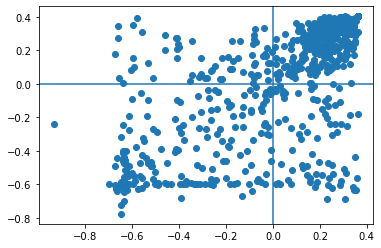

In [126]:
fig, ax = plt.subplots()

ax.scatter(center_both_policies_area_order[:, 0], center_both_policies_area_order[:, 1])
ax.axvline(np.mean(center_both_policies_area_order[:, 0]))
ax.axhline(np.mean(center_both_policies_area_order[:, 1]))

In [127]:
U, Sigma, V_T = np.linalg.svd(center_both_policies_area_order)

In [128]:
print(U.shape)
print(Sigma.shape)
print(V_T.shape)

(800, 800)
(5,)
(5, 5)


In [129]:
eigs = Sigma**2
eigs_frac = eigs / np.sum(eigs)

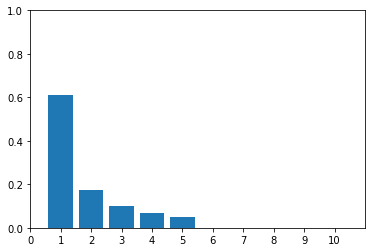

In [130]:
fig, ax = plt.subplots()

ax.bar(np.arange(eigs_frac[:10].shape[0]) + 1, eigs_frac[:10])
ax.set_ylim(0, 1)
ax.set_xlim(0, 11)
xticks = ax.set_xticks(np.arange(0, 11))

In [131]:
np.sum(eigs_frac[:2])

0.7839352388255587

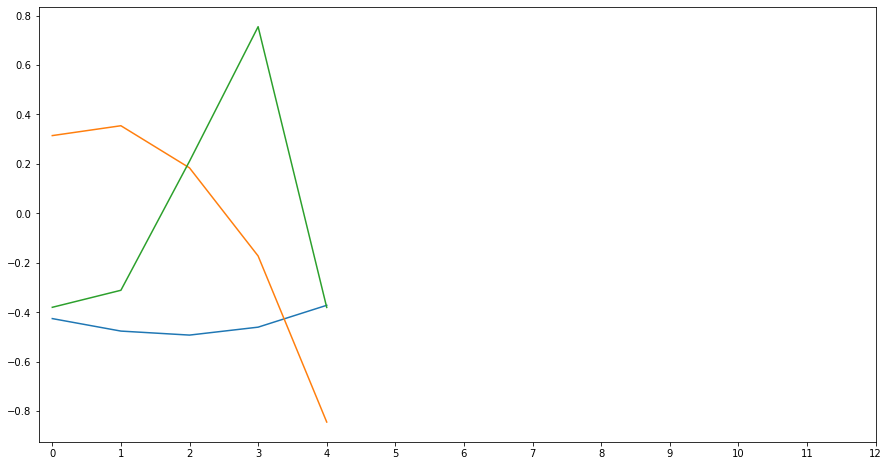

In [132]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(V_T.T[:, 0])
ax.plot(V_T.T[:, 1])
ax.plot(V_T.T[:, 2])
x_ticks = ax.set_xticks(np.arange(13))

In [133]:
np.linalg.norm(V_T.T[:, 0])

1.0

In [134]:
# Separate the vectors from the sweeping and random policies
centered_sweep_vecs = center_both_policies_area_order[:400, :]
centered_random_vecs = center_both_policies_area_order[400:, :]

# Project onto principal directions
projected_sweep_vecs = centered_sweep_vecs @ V_T.T
projected_random_vecs = centered_random_vecs @ V_T.T

# First two principal components
projected_sweep_three = projected_sweep_vecs[:, :3]
projected_random_three = projected_random_vecs[:, :3]
print(projected_sweep_three.shape)
print(projected_random_three.shape)

(400, 3)
(400, 3)


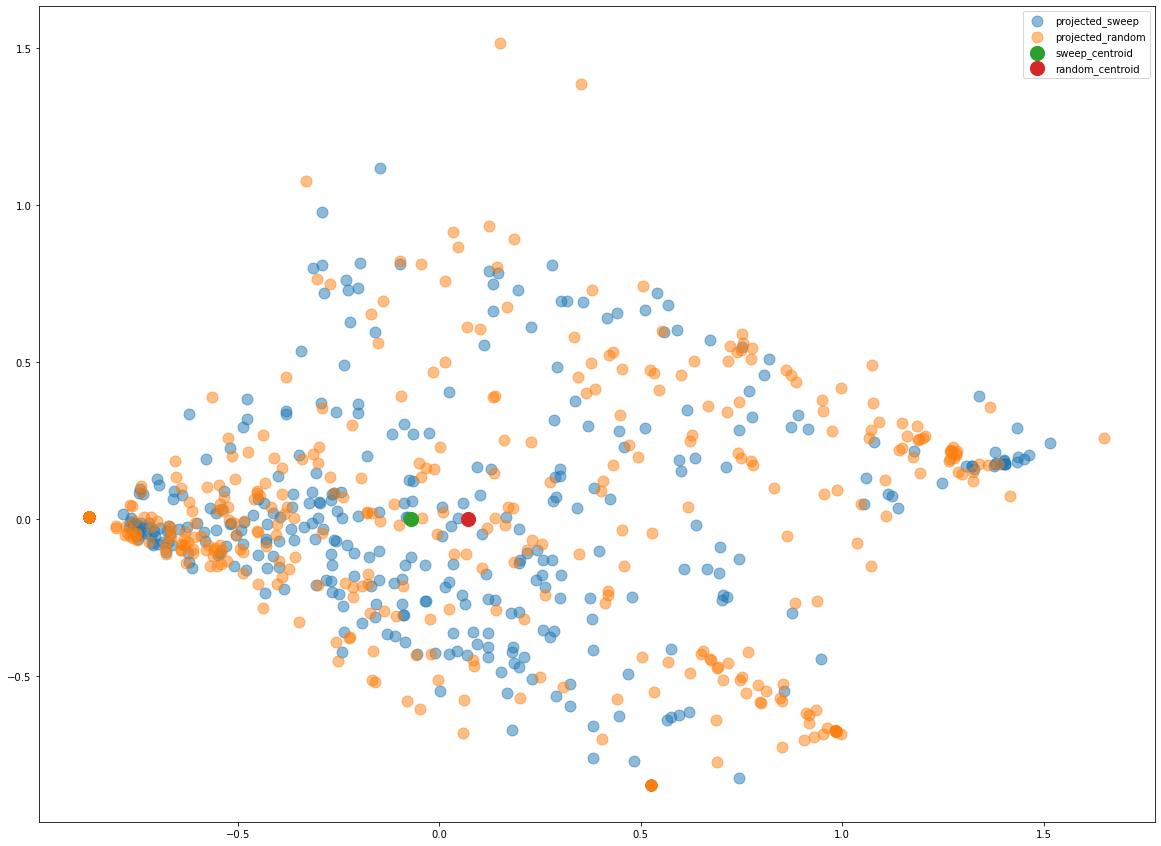

In [135]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], label='projected_sweep', s=120, alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], label='projected_random', s=120, alpha=0.5)

sweep_centroid = np.mean(projected_sweep_three, axis=0)
random_centroid = np.mean(projected_random_three, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
#ax.set_xlim(-2, 6)
#ax.set_ylim(-4, 4)
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

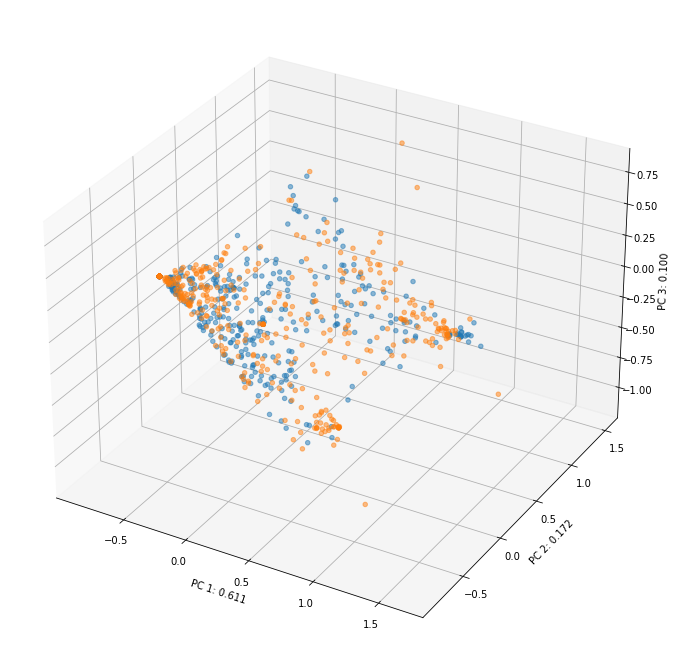

In [136]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -100)
ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], projected_sweep_three[:, 2], alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], projected_random_three[:, 2], alpha=0.5)
ax.set_xlabel('PC 1: {0}'.format(eigs_frac[0])[:11])
ax.set_ylabel('PC 2: {0}'.format(eigs_frac[1])[:11])
ax.set_zlabel('PC 3: {0}'.format(eigs_frac[2])[:11])

plt.show()

/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

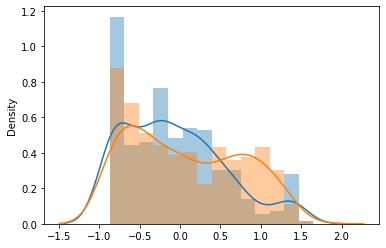

In [137]:
import seaborn as sns
sns.distplot(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))
sns.distplot(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))

In [138]:
np.var(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]]))

0.43516745518311223

/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

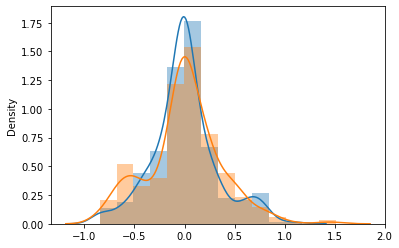

In [139]:
sns.distplot(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))
sns.distplot(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))

In [140]:
np.var(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]]))

0.12256933537855767

/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

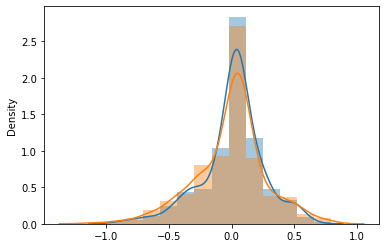

In [141]:
sns.distplot(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))
sns.distplot(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))

In [142]:
np.var(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]]))

0.07184119500483983

Text(0.5, 1.0, 'PC 3')

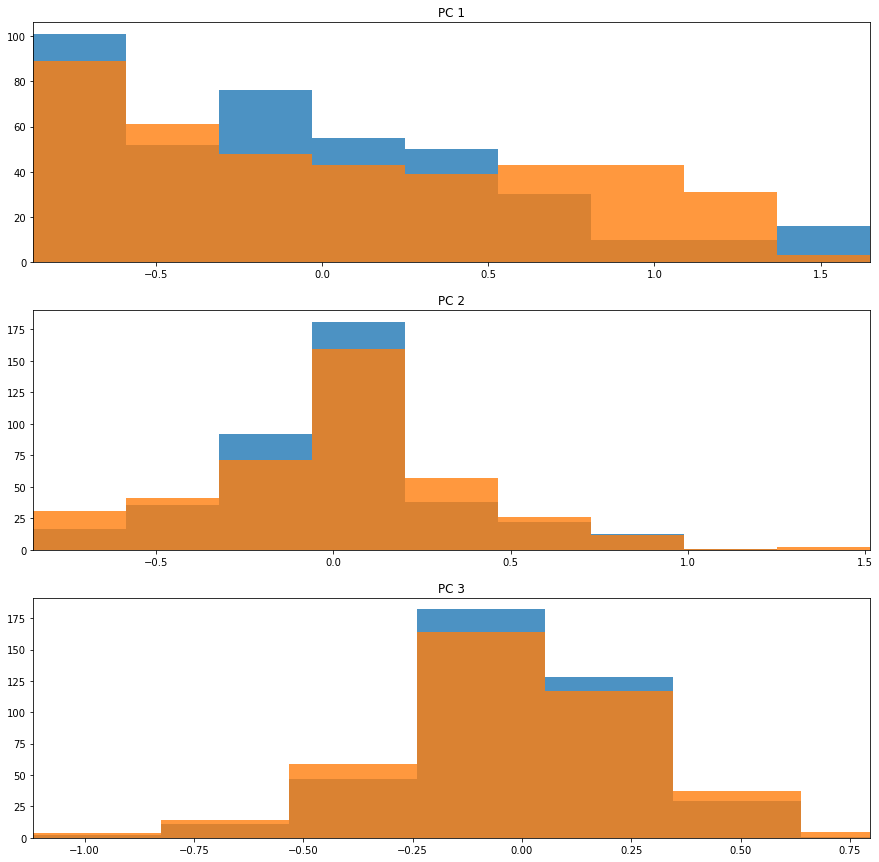

In [143]:
fig, axs = plt.subplots(3, figsize=(15, 15))
sweep_hist = axs[0].hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[0].hist(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[0].set_xlim(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])))
axs[0].set_title('PC 1')

sweep_hist = axs[1].hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[1].hist(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[1].set_xlim(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])))
axs[1].set_title('PC 2')

sweep_hist = axs[2].hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[2].hist(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[2].set_xlim(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])))
axs[2].set_title('PC 3')


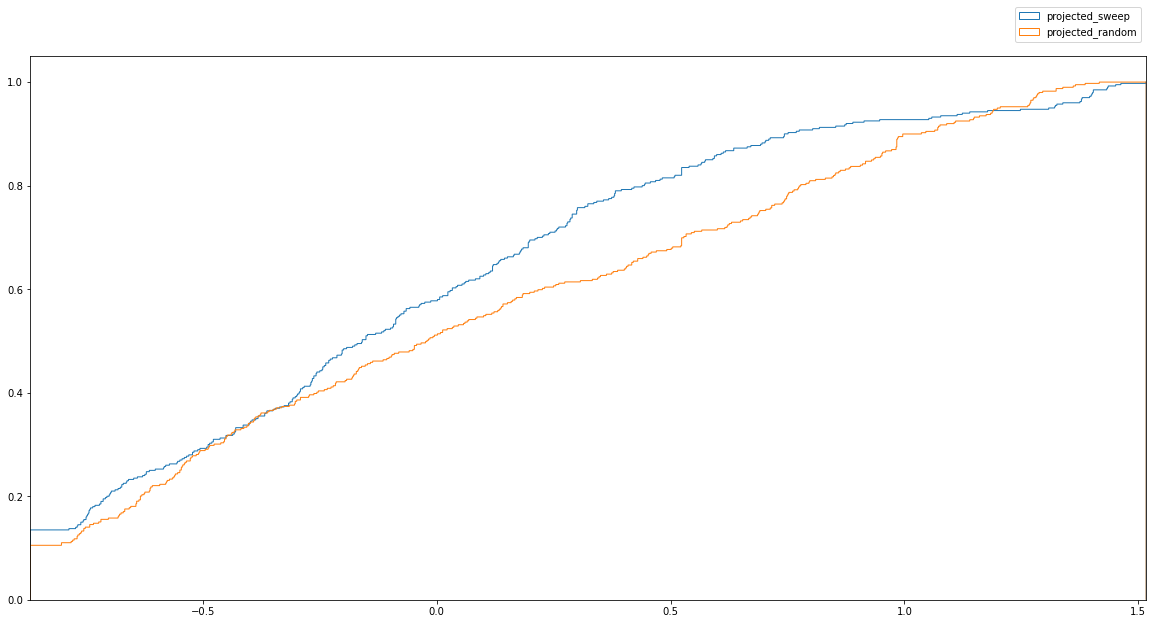

In [144]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]))
sweep_mean = np.mean(projected_sweep_three[:, 0])#, axis=0)
random_mean = np.mean(projected_random_three[:, 0])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(0.22)
#ax.axvline(0.26)
ax.legend(bbox_to_anchor=(1, 1.1))

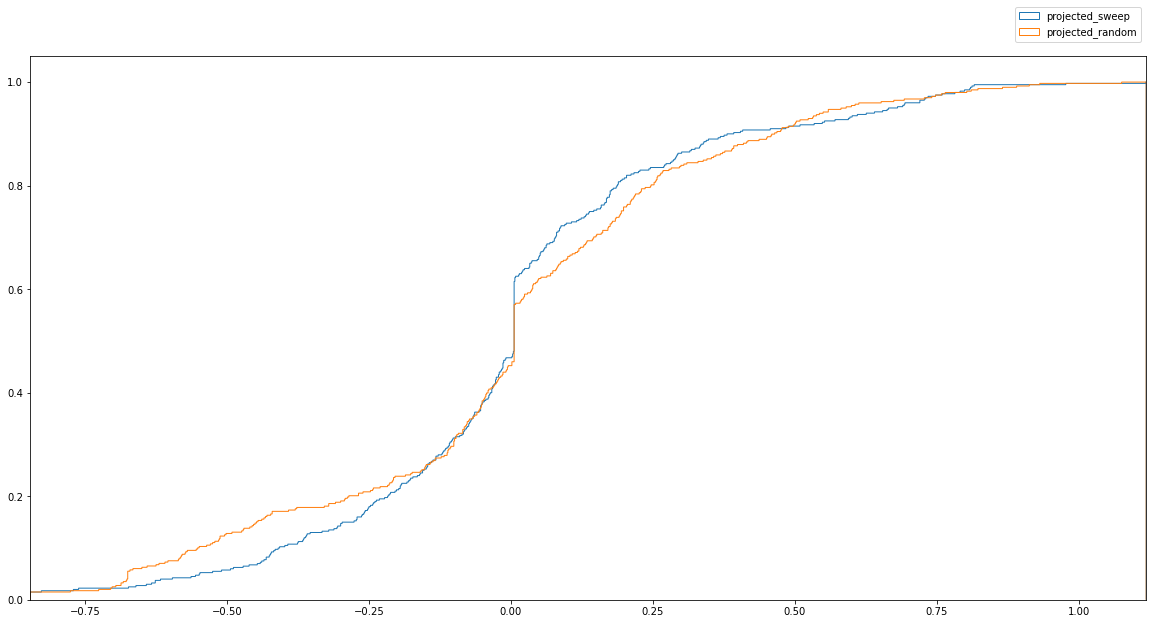

In [145]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]))
sweep_mean = np.mean(projected_sweep_three[:, 1])#, axis=0)
random_mean = np.mean(projected_random_three[:, 1])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

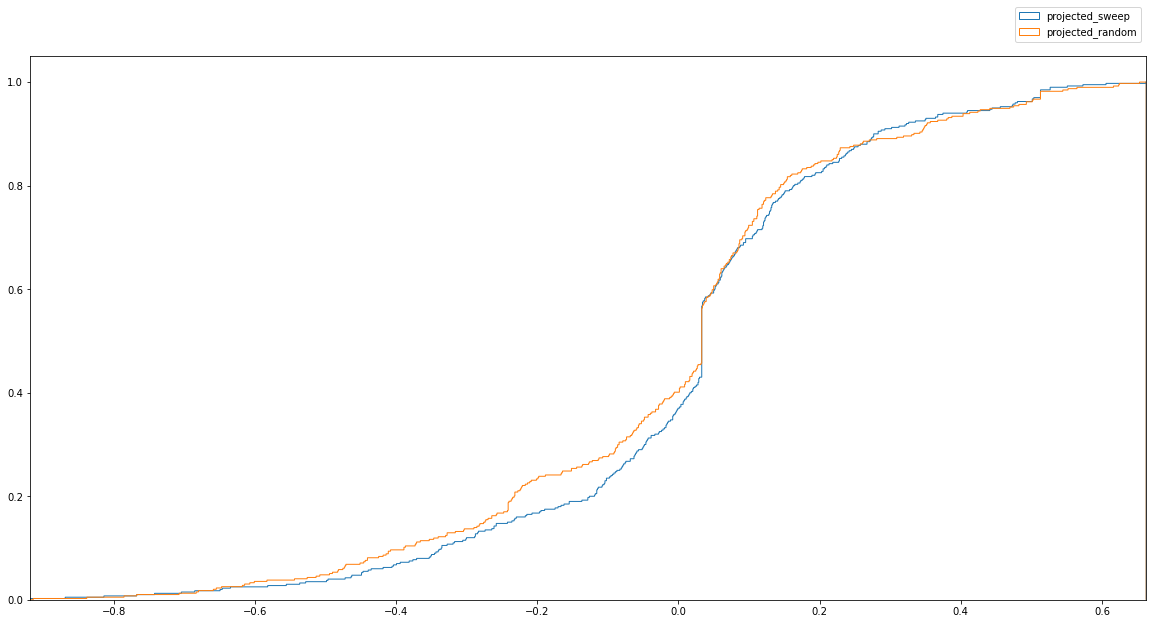

In [146]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]))
sweep_mean = np.mean(projected_sweep_three[:, 2])#, axis=0)
random_mean = np.mean(projected_random_three[:, 2])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [147]:
# Order the cells in terms of PC1 score. Consider cells from both policies

increasing_pc1_lst = []

center_both_policies_projected = np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])
center_both_policies_projected_arg_sorted = np.argsort(center_both_policies_projected)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num,environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            


NameError: name 'convert_cell_num' is not defined

Error in callback <function flush_figures at 0x7f25e7673f70> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Is there anything that justifies splitting? for example, if they seem like obvious categories

In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc2_lst = []

center_both_policies_projected_pc2 = np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])
center_both_policies_projected_arg_sorted_pc2 = np.argsort(center_both_policies_projected_pc2)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arangepath_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc3_lst = []

center_both_policies_projected_pc3 = np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])
center_both_policies_projected_arg_sorted_pc3 = np.argsort(center_both_policies_projected_pc3)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[:5]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



## Same Start

In [ ]:
sweep_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
        sweep_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_sweep[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[5:9])
                                  
random_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
        random_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_random[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[5:9])


In [ ]:
sweep_cell_pd_vec_list_area_order[0]

In [ ]:
sweep_cell_pd_vec_area_order_stack = sweep_cell_pd_vec_list_area_order[0]
for cell in sweep_cell_pd_vec_list_area_order[1:]:
    sweep_cell_pd_vec_area_order_stack = np.vstack([sweep_cell_pd_vec_area_order_stack, cell])

random_cell_pd_vec_area_order_stack = random_cell_pd_vec_list_area_order[0]
for cell in random_cell_pd_vec_list_area_order[1:]:
    random_cell_pd_vec_area_order_stack = np.vstack([random_cell_pd_vec_area_order_stack, cell])

print(sweep_cell_pd_vec_area_order_stack.shape)
print(random_cell_pd_vec_area_order_stack.shape)

In [ ]:
sweep_cell_pd_vec_area_order_stack.shape

In [ ]:
random_cell_pd_vec_area_order_stack.shape

In [ ]:
both_policies_area_order = np.vstack([sweep_cell_pd_vec_area_order_stack, random_cell_pd_vec_area_order_stack])

In [ ]:
both_policies_area_order.shape

In [ ]:
center_both_policies_area_order = both_policies_area_order - np.mean(both_policies_area_order, axis=0)

In [ ]:
print(center_both_policies_area_order.shape)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(center_both_policies_area_order[:, 0], center_both_policies_area_order[:, 1])
ax.axvline(np.mean(center_both_policies_area_order[:, 0]))
ax.axhline(np.mean(center_both_policies_area_order[:, 1]))

In [ ]:
U, Sigma, V_T = np.linalg.svd(center_both_policies_area_order)

In [ ]:
print(U.shape)
print(Sigma.shape)
print(V_T.shape)

In [ ]:
eigs = Sigma**2
eigs_frac = eigs / np.sum(eigs)

In [ ]:
fig, ax = plt.subplots()

ax.bar(np.arange(eigs_frac[:10].shape[0]) + 1, eigs_frac[:10])
ax.set_ylim(0, 1)
ax.set_xlim(0, 11)
xticks = ax.set_xticks(np.arange(0, 11))

In [ ]:
np.sum(eigs_frac[:2])

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(V_T.T[:, 0])
ax.plot(V_T.T[:, 1])
ax.plot(V_T.T[:, 2])
x_ticks = ax.set_xticks(np.arange(13))

In [ ]:
np.linalg.norm(V_T.T[:, 0])

In [ ]:
# Separate the vectors from the sweeping and random policies
centered_sweep_vecs = center_both_policies_area_order[:400, :]
centered_random_vecs = center_both_policies_area_order[400:, :]

# Project onto principal directions
projected_sweep_vecs = centered_sweep_vecs @ V_T.T
projected_random_vecs = centered_random_vecs @ V_T.T

# First two principal components
projected_sweep_three = projected_sweep_vecs[:, :3]
projected_random_three = projected_random_vecs[:, :3]
print(projected_sweep_three.shape)
print(projected_random_three.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], label='projected_sweep', s=120, alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], label='projected_random', s=120, alpha=0.5)

sweep_centroid = np.mean(projected_sweep_three, axis=0)
random_centroid = np.mean(projected_random_three, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
#ax.set_xlim(-2, 6)
#ax.set_ylim(-4, 4)
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -100)
ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], projected_sweep_three[:, 2], alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], projected_random_three[:, 2], alpha=0.5)
ax.set_xlabel('PC 1: {0}'.format(eigs_frac[0])[:11])
ax.set_ylabel('PC 2: {0}'.format(eigs_frac[1])[:11])
ax.set_zlabel('PC 3: {0}'.format(eigs_frac[2])[:11])

plt.show()

In [ ]:
import seaborn as sns
sns.distplot(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))
sns.distplot(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]]))

In [ ]:
sns.distplot(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))
sns.distplot(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]]))

In [ ]:
sns.distplot(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))
sns.distplot(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]]))

In [ ]:
fig, axs = plt.subplots(3, figsize=(15, 15))
sweep_hist = axs[0].hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[0].hist(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[0].set_xlim(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])))
axs[0].set_title('PC 1')

sweep_hist = axs[1].hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[1].hist(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[1].set_xlim(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])))
axs[1].set_title('PC 2')

sweep_hist = axs[2].hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[2].hist(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[2].set_xlim(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])))
axs[2].set_title('PC 3')


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]))
sweep_mean = np.mean(projected_sweep_three[:, 0])#, axis=0)
random_mean = np.mean(projected_random_three[:, 0])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(0.22)
#ax.axvline(0.26)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]))
sweep_mean = np.mean(projected_sweep_three[:, 1])#, axis=0)
random_mean = np.mean(projected_random_three[:, 1])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]))
sweep_mean = np.mean(projected_sweep_three[:, 2])#, axis=0)
random_mean = np.mean(projected_random_three[:, 2])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
# Order the cells in terms of PC1 score. Consider cells from both policies

increasing_pc1_lst = []

center_both_policies_projected = np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])
center_both_policies_projected_arg_sorted = np.argsort(center_both_policies_projected)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num,environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            


In [ ]:
# Is there anything that justifies splitting? for example, if they seem like obvious categories

In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc2_lst = []

center_both_policies_projected_pc2 = np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])
center_both_policies_projected_arg_sorted_pc2 = np.argsort(center_both_policies_projected_pc2)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc3_lst = []

center_both_policies_projected_pc3 = np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])
center_both_policies_projected_arg_sorted_pc3 = np.argsort(center_both_policies_projected_pc3)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[5:9]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



## Same End

In [ ]:
sweep_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
        sweep_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_sweep[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[9:])
                                  
random_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
        random_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_random[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False)[9:])


In [ ]:
sweep_cell_pd_vec_list_area_order[0]

In [ ]:
sweep_cell_pd_vec_area_order_stack = sweep_cell_pd_vec_list_area_order[0]
for cell in sweep_cell_pd_vec_list_area_order[1:]:
    sweep_cell_pd_vec_area_order_stack = np.vstack([sweep_cell_pd_vec_area_order_stack, cell])

random_cell_pd_vec_area_order_stack = random_cell_pd_vec_list_area_order[0]
for cell in random_cell_pd_vec_list_area_order[1:]:
    random_cell_pd_vec_area_order_stack = np.vstack([random_cell_pd_vec_area_order_stack, cell])

print(sweep_cell_pd_vec_area_order_stack.shape)
print(random_cell_pd_vec_area_order_stack.shape)

In [ ]:
sweep_cell_pd_vec_area_order_stack.shape

In [ ]:
random_cell_pd_vec_area_order_stack.shape

In [ ]:
both_policies_area_order = np.vstack([sweep_cell_pd_vec_area_order_stack, random_cell_pd_vec_area_order_stack])

In [ ]:
both_policies_area_order.shape

In [ ]:
center_both_policies_area_order = both_policies_area_order - np.mean(both_policies_area_order, axis=0)

In [ ]:
print(center_both_policies_area_order.shape)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(center_both_policies_area_order[:, 0], center_both_policies_area_order[:, 1])
ax.axvline(np.mean(center_both_policies_area_order[:, 0]))
ax.axhline(np.mean(center_both_policies_area_order[:, 1]))

In [ ]:
U, Sigma, V_T = np.linalg.svd(center_both_policies_area_order)

In [ ]:
print(U.shape)
print(Sigma.shape)
print(V_T.shape)

In [ ]:
eigs = Sigma**2
eigs_frac = eigs / np.sum(eigs)

In [ ]:
fig, ax = plt.subplots()

ax.bar(np.arange(eigs_frac[:10].shape[0]) + 1, eigs_frac[:10])
ax.set_ylim(0, 1)
ax.set_xlim(0, 11)
xticks = ax.set_xticks(np.arange(0, 11))

In [ ]:
np.sum(eigs_frac[:2])

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(V_T.T[:, 0])
ax.plot(V_T.T[:, 1])
ax.plot(V_T.T[:, 2])
x_ticks = ax.set_xticks(np.arange(13))

In [ ]:
np.linalg.norm(V_T.T[:, 0])

In [ ]:
# Separate the vectors from the sweeping and random policies
centered_sweep_vecs = center_both_policies_area_order[:400, :]
centered_random_vecs = center_both_policies_area_order[400:, :]

# Project onto principal directions
projected_sweep_vecs = centered_sweep_vecs @ V_T.T
projected_random_vecs = centered_random_vecs @ V_T.T

# First two principal components
projected_sweep_three = projected_sweep_vecs[:, :3]
projected_random_three = projected_random_vecs[:, :3]
print(projected_sweep_three.shape)
print(projected_random_three.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], label='projected_sweep', s=120, alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], label='projected_random', s=120, alpha=0.5)

sweep_centroid = np.mean(projected_sweep_three, axis=0)
random_centroid = np.mean(projected_random_three, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
#ax.set_xlim(-2, 6)
#ax.set_ylim(-4, 4)
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -100)
ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], projected_sweep_three[:, 2], alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], projected_random_three[:, 2], alpha=0.5)
ax.set_xlabel('PC 1: {0}'.format(eigs_frac[0])[:11])
ax.set_ylabel('PC 2: {0}'.format(eigs_frac[1])[:11])
ax.set_zlabel('PC 3: {0}'.format(eigs_frac[2])[:11])

plt.show()

In [ ]:
import seaborn as sns
sns.distplot(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))
sns.distplot(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]]))

In [ ]:
sns.distplot(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))
sns.distplot(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]]))

In [ ]:
sns.distplot(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))
sns.distplot(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]]))

In [ ]:
fig, axs = plt.subplots(3, figsize=(15, 15))
sweep_hist = axs[0].hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[0].hist(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[0].set_xlim(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])))
axs[0].set_title('PC 1')

sweep_hist = axs[1].hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[1].hist(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[1].set_xlim(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])))
axs[1].set_title('PC 2')

sweep_hist = axs[2].hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[2].hist(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[2].set_xlim(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])))
axs[2].set_title('PC 3')


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]))
sweep_mean = np.mean(projected_sweep_three[:, 0])#, axis=0)
random_mean = np.mean(projected_random_three[:, 0])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(0.22)
#ax.axvline(0.26)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]))
sweep_mean = np.mean(projected_sweep_three[:, 1])#, axis=0)
random_mean = np.mean(projected_random_three[:, 1])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]))
sweep_mean = np.mean(projected_sweep_three[:, 2])#, axis=0)
random_mean = np.mean(projected_random_three[:, 2])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
# Order the cells in terms of PC1 score. Consider cells from both policies

increasing_pc1_lst = []

center_both_policies_projected = np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])
center_both_policies_projected_arg_sorted = np.argsort(center_both_policies_projected)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num,environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            


In [ ]:
# Is there anything that justifies splitting? for example, if they seem like obvious categories

In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc2_lst = []

center_both_policies_projected_pc2 = np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])
center_both_policies_projected_arg_sorted_pc2 = np.argsort(center_both_policies_projected_pc2)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc3_lst = []

center_both_policies_projected_pc3 = np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])
center_both_policies_projected_arg_sorted_pc3 = np.argsort(center_both_policies_projected_pc3)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[9:]
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(path_eq_vals.shape[0]), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_flip_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            

